In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

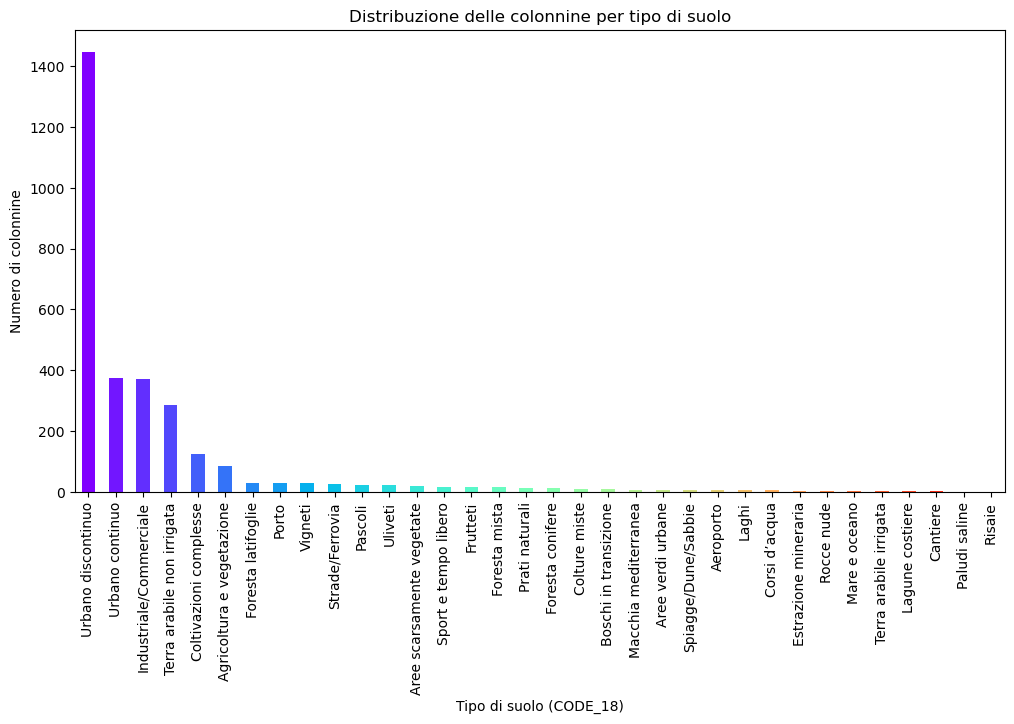

In [ ]:
# Carica il dataset delle colonnine con l'uso del suolo
df = pd.read_csv("ExportedDatasets/colonnine.csv")

# Conta il numero di colonnine per ogni tipo di suolo
counts = df["Tipo Zona String"].value_counts()

num_bars = len(counts)
colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))

# Grafico a barre
plt.figure(figsize=(12,6))
counts.plot(kind="bar", color=colors)
plt.xlabel("Tipo di suolo (CODE_18)")
plt.ylabel("Numero di colonnine")
plt.title("Distribuzione delle colonnine per tipo di suolo")
plt.xticks(rotation=45)

# Ruota le etichette dell'asse X in verticale
plt.xticks(rotation=90)
plt.show()


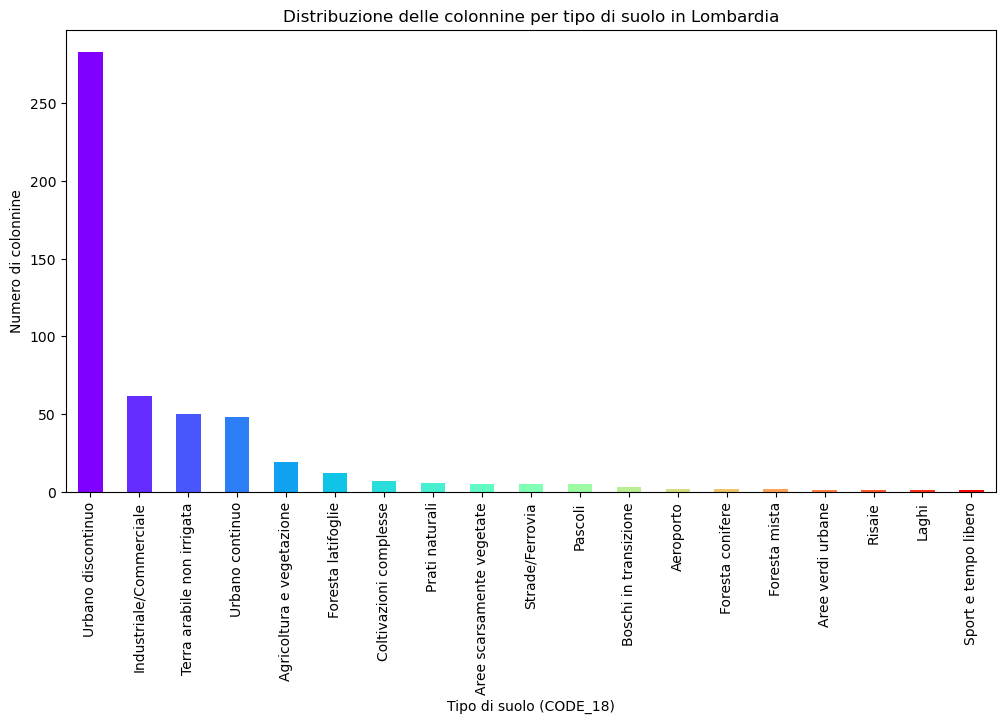

In [ ]:
# Carica il dataset delle colonnine con l'uso del suolo
df = pd.read_csv("ExportedDatasets/colonnineLombardia.csv")

# Conta il numero di colonnine per ogni tipo di suolo
counts = df["Tipo Zona String"].value_counts()

num_bars = len(counts)
colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))

# Grafico a barre
plt.figure(figsize=(12,6))
counts.plot(kind="bar", color=colors)
plt.xlabel("Tipo di suolo (CODE_18)")
plt.ylabel("Numero di colonnine")
plt.title("Distribuzione delle colonnine per tipo di suolo in Lombardia")
plt.xticks(rotation=45)

# Ruota le etichette dell'asse X in verticale
plt.xticks(rotation=90)
plt.show()

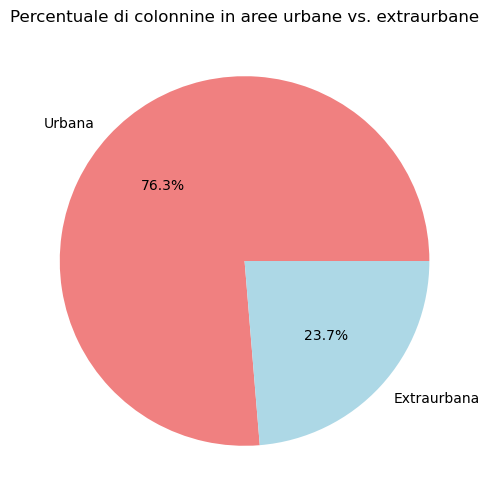

In [ ]:
# Definisco i codici urbani (personalizza in base ai dati)
urbani = [111, 112, 121]

# Crea una colonna che indica se la colonnina è in area urbana o extraurbana
df["Zona"] = df["Tipo Zona"].apply(lambda x: "Urbana" if x in urbani else "Extraurbana")

# Conta le colonnine per zona
counts = df["Zona"].value_counts()

# Grafico a torta
plt.figure(figsize=(6,6))
counts.plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral", "lightblue"])
plt.ylabel("")
plt.title("Percentuale di colonnine in aree urbane vs. extraurbane")
plt.show()


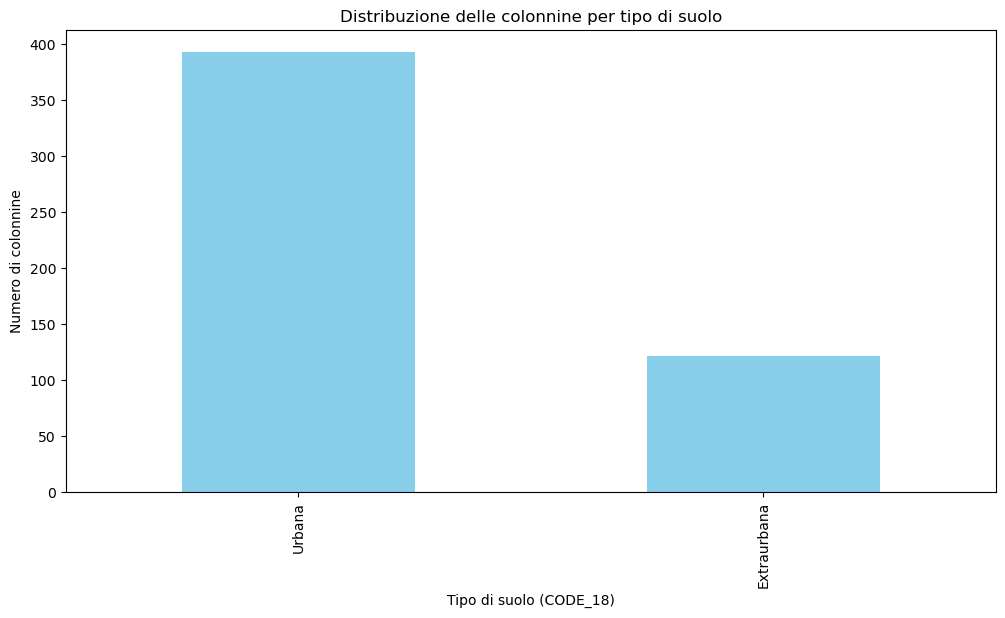

In [ ]:
# Conta il numero di colonnine per ogni tipo di suolo
counts = df["Zona"].value_counts()

# Grafico a barre
plt.figure(figsize=(12,6))
counts.plot(kind="bar", color="skyblue")
plt.xlabel("Tipo di suolo (CODE_18)")
plt.ylabel("Numero di colonnine")
plt.title("Distribuzione delle colonnine per tipo di suolo")
plt.xticks(rotation=45)

# Ruota le etichette dell'asse X in verticale
plt.xticks(rotation=90)
plt.show()

In [5]:
colonnine = pd.read_csv("ExportedDatasets/colonnine.csv")
land_cover = pd.read_csv("ExportedDatasets/land_cover.csv")

# Raggruppamento per 'Categoria' e somma dei valori di 'Valore'
df_grouped = land_cover.groupby('Tipo Zona')['Area_Ha'].sum().reset_index()
df_grouped2 = colonnine.groupby('Tipo Zona').size().reset_index(name='Conteggio')

# Merge dei due DataFrame sulla colonna "Tipo Zona"
df_finale = pd.merge(df_grouped, df_grouped2, on='Tipo Zona')
df_finale['Area_Ha (Km2)'] = df_finale['Area_Ha'] / 100
df_finale['Densità Km2'] = (df_finale['Conteggio'] / df_finale['Area_Ha (Km2)']) * 1000

# Visualizza il risultato
pd.set_option('display.float_format', '{:.2f}'.format)
print(df_finale)

    Tipo Zona     Area_Ha  Conteggio  Area_Ha (Km2)  Densità Km2
0         111   160571.88        376        1605.72       234.16
1         112  1051437.26       1446       10514.37       137.53
2         121   308452.82        370        3084.53       119.95
3         122    20148.93         26         201.49       129.04
4         123    12939.83         28         129.40       216.39
5         124    22939.34          5         229.39        21.80
6         131    50402.08          4         504.02         7.94
7         133     3648.64          2          36.49        54.81
8         141    11521.72          5         115.22        43.40
9         142    33425.93         17         334.26        50.86
10        211  7975326.61        285       79753.27         3.57
11        212    69984.98          2         699.85         2.86
12        213   294106.49          1        2941.06         0.34
13        221   628870.12         28        6288.70         4.45
14        222   378871.70

In [6]:
# Dizionario di mappatura: codice -> descrizione italiana compatta
mapping = {
    111: "Urbano continuo",
    112: "Urbano discontinuo",
    121: "Industr./Commerciale",
    122: "Strade/Ferrovia",
    123: "Porto",
    124: "Aeroporto",
    131: "Estrazione mineraria",
    132: "Discarica",
    133: "Cantieri",
    141: "Aree verdi urbane",
    142: "Sport/Tempo libero",
    211: "Terra arabile non irrigata",
    212: "Terra arabile irrigata",
    213: "Risaie",
    221: "Vigneti",
    222: "Frutteti",
    223: "Uliveti",
    231: "Pascoli",
    241: "Colture miste",
    242: "Coltivazioni complesse",
    243: "Agricoltura e veg.",
    244: "Aree agro-forestali",
    311: "Foresta latifoglie",
    312: "Foresta conifere",
    313: "Foresta mista",
    321: "Prati naturali",
    322: "Brughiere",
    323: "Macchia med.",
    324: "Boschi transizionali",
    331: "Spiagge/Dune/Sabbie",
    332: "Rocce nude",
    333: "Aree scarsamente veg.",
    334: "Aree bruciate",
    335: "Ghiacciai/Neve",
    411: "Paludi interne",
    412: "Torbiere",
    421: "Paludi saline",
    422: "Saline",
    423: "Piane intertidali",
    511: "Corsi d'acqua",
    512: "Laghi",
    521: "Lagune costiere",
    522: "Estuari",
    523: "Mare/Oceano"
}

C:\Users\mario\AppData\Local\Temp\ipykernel_19852\3591986196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Descrizione'] = df_subset['Tipo Zona'].map(mapping)


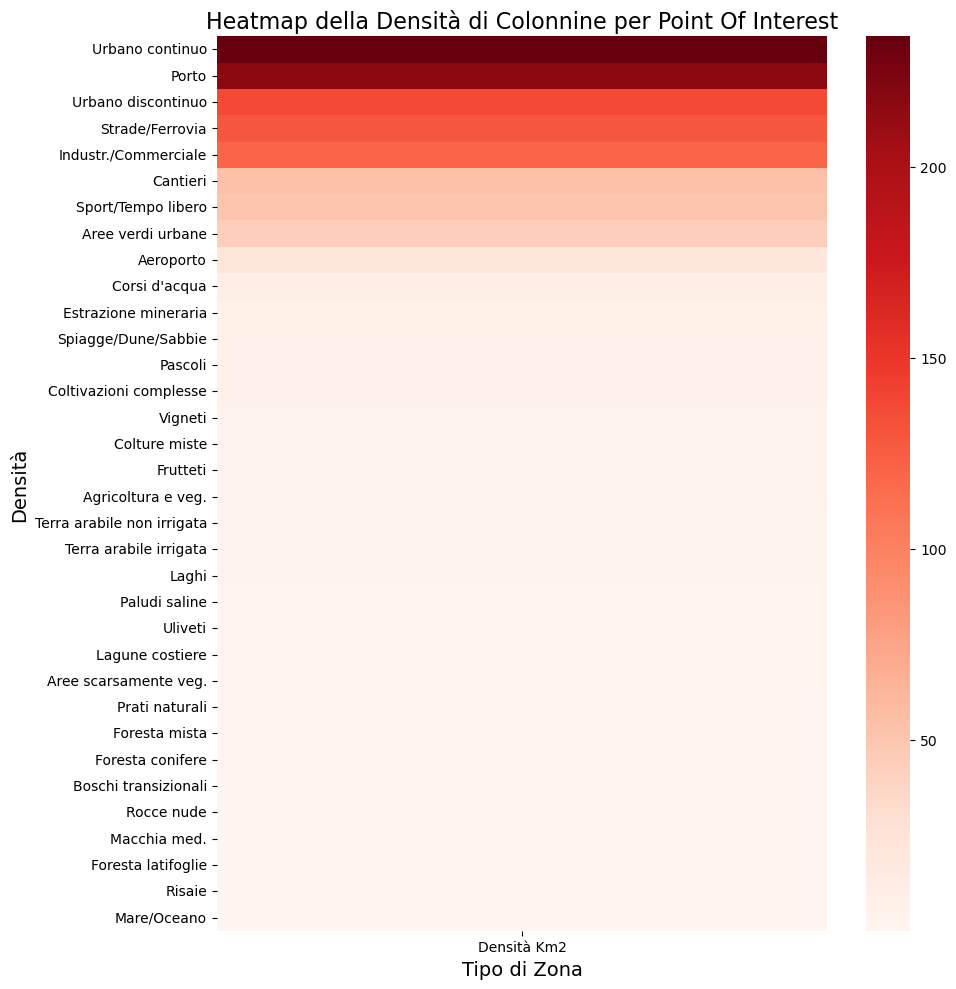

In [ ]:
df_subset = df_finale[['Tipo Zona', 'Densità Km2']]
# Aggiungiamo la colonna 'Descrizione' al DataFrame
df_subset['Descrizione'] = df_subset['Tipo Zona'].map(mapping)
df_sorted = df_subset.sort_values(by='Densità Km2', ascending=False)

# Creazione di una matrice pivot per avere Tipo Zona sulle righe e Area_Ha nelle colonne
df_pivot = df_sorted.pivot_table(values='Densità Km2', index='Descrizione', aggfunc='mean')

df_pivot_sorted = df_pivot.sort_values(by='Densità Km2', ascending=False)
# Creazione della heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_pivot_sorted, cmap="Reds", cbar=True)

plt.title('Heatmap della Densità di Colonnine per Point Of Interest', fontsize=16)
plt.xlabel('Tipo di Zona', fontsize=14)
plt.ylabel('Densità', fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
# Caricare i CSV
df_totale = pd.read_csv("ExportedDatasets/zoneUrbane.csv")  # CSV con le aree urbane totali
df_scoperte = pd.read_csv("ExportedDatasets/urbaneScoperte.csv")  # CSV con le aree urbane scoperte

# Raggruppare per regione e sommare le aree
df_totale = df_totale.groupby("DEN_REG")["area"].sum().reset_index()
df_scoperte = df_scoperte.groupby("DEN_REG")["AreaScoperte"].sum().reset_index()

# Unisci i due dataset sulla regione
df = pd.merge(df_totale, df_scoperte, on="DEN_REG", how="left")

# Calcola la percentuale di area scoperta rispetto all'area totale
df["percentuale_scoperta"] = (df["AreaScoperte"] / df["area"]) * 100

# Mostra il risultato
print(df)

                  DEN_REG          area  AreaScoperte  percentuale_scoperta
0                 Abruzzo  307857093.49  167881057.26                 54.53
1              Basilicata  143043846.49  121504394.39                 84.94
2                Calabria  510316967.23  361713329.10                 70.88
3                Campania  953351844.24  564077122.94                 59.17
4          Emilia-Romagna 1113357579.61  494072282.30                 44.38
5   Friuli-Venezia Giulia  570022119.65  160375059.47                 28.13
6                   Lazio  967332733.82  499716387.84                 51.66
7                 Liguria  248563750.10  105914058.02                 42.61
8               Lombardia 2597712547.57  738795685.83                 28.44
9                  Marche  423366333.92  237256617.45                 56.04
10                 Molise   77734618.01   62314074.53                 80.16
11               Piemonte 1230286329.42  504400037.38                 41.00
12          

                  DEN_REG          area  AreaScoperte  percentuale_scoperta
1              Basilicata  1.430438e+08  1.215044e+08             84.942063
13               Sardegna  6.134600e+08  5.009517e+08             81.660055
10                 Molise  7.773462e+07  6.231407e+07             80.162579
2                Calabria  5.103170e+08  3.617133e+08             70.880130
12                 Puglia  9.139208e+08  5.815616e+08             63.633700
17                 Umbria  2.796292e+08  1.687339e+08             60.342005
3                Campania  9.533518e+08  5.640771e+08             59.167780
9                  Marche  4.233663e+08  2.372566e+08             56.040502
0                 Abruzzo  3.078571e+08  1.678811e+08             54.532139
6                   Lazio  9.673327e+08  4.997164e+08             51.659204
4          Emilia-Romagna  1.113358e+09  4.940723e+08             44.376783
7                 Liguria  2.485638e+08  1.059141e+08             42.610420
11          

C:\Users\mario\AppData\Local\Temp\ipykernel_17188\959732234.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["DEN_REG"], y=df["percentuale_scoperta"], palette=colors)


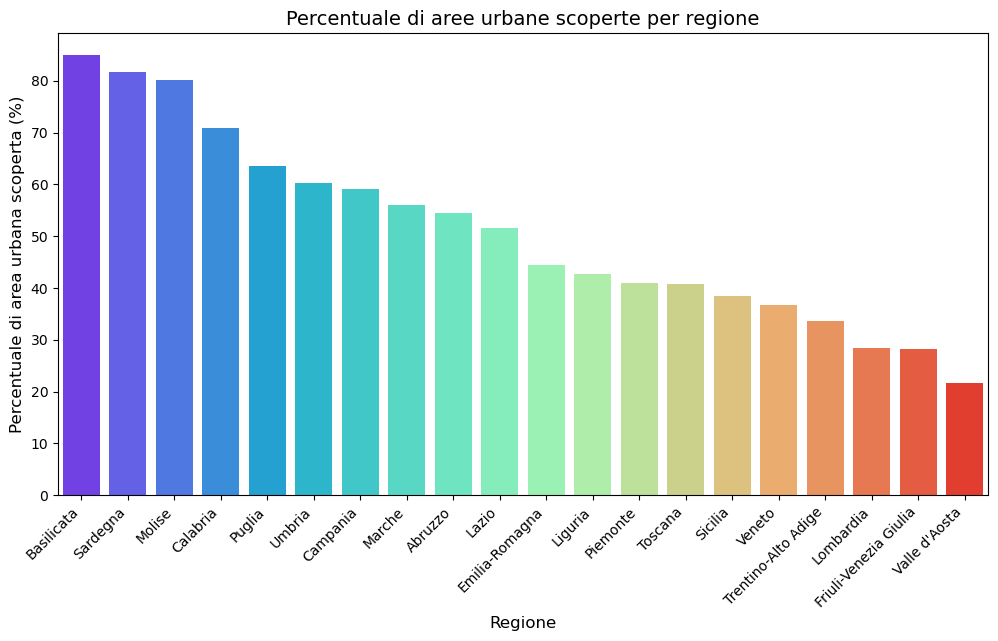

In [ ]:
# Ordina il dataframe in base alla percentuale scoperta in ordine decrescente
df = df.sort_values(by="percentuale_scoperta", ascending=False)
print(df)

# Genera una palette di colori rainbow con la stessa lunghezza delle regioni
colors = sns.color_palette("rainbow", len(df))

# Imposta la dimensione del grafico
plt.figure(figsize=(12, 6))

# Crea il grafico a barre con la colorazione rainbow
sns.barplot(x=df["DEN_REG"], y=df["percentuale_scoperta"], palette=colors)

# Ruota le etichette dell'asse x per leggibilità
plt.xticks(rotation=45, ha="right")

# Aggiungi titoli e etichette
plt.xlabel("Regione", fontsize=12)
plt.ylabel("Percentuale di area urbana scoperta (%)", fontsize=12)
plt.title("Percentuale di aree urbane scoperte per regione", fontsize=14)

# Mostra il grafico
plt.show()

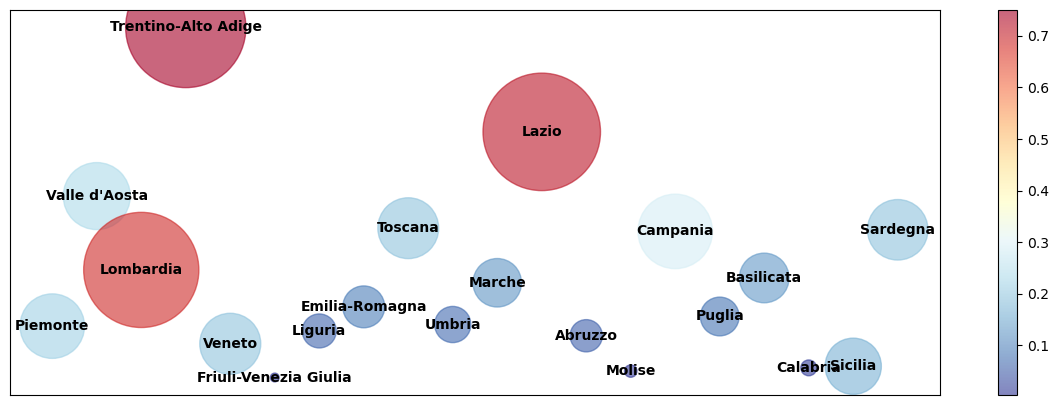

In [ ]:
df = pd.read_csv("ExportedDatasets/mappaPriorita.csv")

# Creazione del bubble chart
plt.figure(figsize=(15,5))

# Normalizza i punteggi per mappare i colori
norm = plt.Normalize(df['Priorita'].min(), df['Priorita'].max())

# Crea una mappa di colori che va dal blu al rosso
colors = plt.cm.RdYlBu_r(norm(df['Priorita']))

# Usa il punteggio per determinare la dimensione delle bolle
scatter = plt.scatter(df['DEN_REG'], df['saturazion'], s=df['Priorita']*10000, c=df['Priorita'], cmap='RdYlBu_r', alpha=0.6)

# Aggiungere i nomi delle regioni all'interno delle bolle
for i in range(len(df)):
    plt.text(df['DEN_REG'][i], df['saturazion'][i], df['DEN_REG'][i], ha='center', va='center', fontweight='bold')

# Etichette e titolo
plt.xlabel('Regioni')
plt.ylabel('Altro Attributo')

# Ruota le etichette dell'asse X per migliorarne la leggibilità
plt.xticks(rotation=45)

# Nascondere gli assi X e Y
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

# Aggiungere la barra dei colori (colorbar) per spiegare la scala cromatica
plt.colorbar(scatter)

# Mostra il grafico
plt.show()